# Image Classification using (Shallow) Machine Learning Techniques

Image classification and machine learning around images is almost always delegated to deep machine learning algorithms such as TensorFlow, MXNet or Keras.

However, machine learning algorithms can also be used to help answer these questions as well.  Having an understanding around how to apply machine learning algorithms to common problems will be an increasingly important skill to have.

**Adrian Rosebrock** - Entrepreneur and Ph.D in Computer Vision, Machine Learning and Information Retrieval.  
[PyImageSearch](https://www.pyimagesearch.com/start-here-learn-computer-vision-opencv/)

---

<font size="3"><i>
"And perhaps most importantly, in the near future, a computer scientist without at least some knowledge of AI [Artificial Intelligence], DL [Deep Learning], CV [Computer Vision] will be like an engineer without basic programming skills — <b>potentially unemployable and overlooked for new job opportunities, research grants, and projects.</b>"
    </i>    </font>
    
    
This notebook was inspired by Adrians Blog post: 

[Machine Learning in Python](https://www.pyimagesearch.com/2019/01/14/machine-learning-in-python/)

I highly recommend his blogs and tutorials.  They are well written and maintained.


# Overview

This notebook will focus on the the shallow machine learning techniques.  Another notebook will take the same input data and describe how to apply deep learning techniques.




Goal is to extract the following image features so that we can train a supervised machine learning model to predict one of 3 different categories.

# Local Machine Setup

These instructions are somewhat high level, meaning you might have to look up how to install certain software for you particular machine - but the steps are correct.

Because this is a notebook about Computer Vision, one of the most common computer vision libraries is *OpenCV*.  You will have to install OpenCV on your machines.

## OpenCV 4.x

At the time of this writing, OpenCV 4.0.1 is released with 4.1.0 on the way.  You can find more information at:
[https://docs.opencv.org/4.0.1/](https://docs.opencv.org/4.0.1/).

It is recommended that you install the latest version for your computer.

## Python Libraries

```python
pip install numpy
pip install sklearn
```

# Image Processing Overview

This section is meant to be short, and direct to lay a foundation of the components of an image

### Image

An image is made up of a collection of pixels.  The pixel is the most fundemental building block of an image and there is no finer granularity.

A 2D image is thought of as a grid or matrix of X,Y values.  The upper left corner is considered 0,0 and the X value increase from left to right and the Y value increases from top to bottom.

For example a 500 x 300 pixel image has 500 rows and 300 columns for a total number of pixels = 500 * 300 = 150,000.

#### Grayscale and Color
Pixels are either a single value for grayscale or a tuple of 3 values for Red, Green Blue.  Each pixel intensity ranges in value from 0, black to 255 or white.

<font size="4">Assuming a color channel in the order:  Red, Green Blue</font>

A white pixel is a tuple of, (255,255,255).  A red pixel is a tuple of (255, 0, 0 )

The reason we stress the color channel order is because OpenCV stores the color change as Green, Blue, Red.  It is just how they do it and you just have to know it and work with it.  There are conversion routines built into OpenCV.

![SampleImage](notebook_images/letter_I.png)


#### Histogram

A histogram represents the distribution of pixel intensities (either grayscale or color) in an image.

![histo](notebook_images/histogram.png)




# OpenCV

Lets explore some of the operations and capabilitiles of OpenCV.  It is a very capable and powerful image library and we are just going to look at the minimum of features needed for this notebook. 


In [42]:
from matplotlib import pyplot as plt
import cv2

In [43]:
print(cv2.__version__)

4.0.1


### Read and Show an Image

In [44]:
def show_grayscale(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(6,8))
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.show()
    
def show_rgb(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()


def show_bgr(img_path, name):
    img = cv2.imread(img_path)

    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()

    

In [45]:
cat_image_path = 'test_images/cat.jpg'
dog_image_path = 'test_images/dog.jpg'

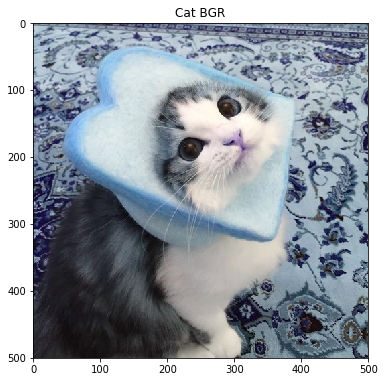

In [46]:
show_bgr(cat_image_path, 'Cat BGR')

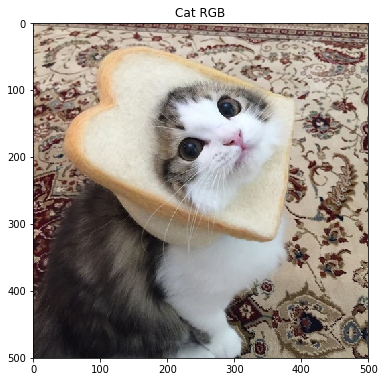

In [47]:
show_rgb(cat_image_path, 'Cat RGB')

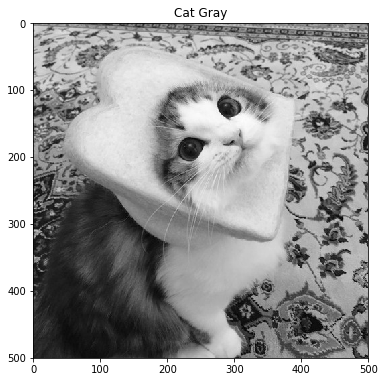

In [48]:
show_grayscale(cat_image_path, 'Cat Gray')

### Split Image into Red, Green and Blue channels

We would like to do this so that we can separate the colors channels so that we can operate on each channel differently.

Use **OpenCV** *split* method to split the image into 3 numpy arrays.

Using numpy we can operate on the arrays efficiently.

Function Name	Description
- np.sum	Compute sum of elements

- np.mean	Compute mean of elements

- np.std	Compute standard deviation

- np.var	Compute variance

- np.min	Find minimum value

- np.max	Find maximum value


In [49]:
# RECALL: OpenCV returns the image in Blue, Green, Red order NOT Red,Green,Blue
cat_image = cv2.imread(cat_image_path)
(B,G,R) = cv2.split(cat_image)

In [50]:
type(B)

numpy.ndarray

In [51]:
(R.mean(), G.mean(), B.mean())

(145.248656, 134.301132, 124.634632)

In [52]:
(R.std(), G.std(), B.std())

(64.34106845704122, 66.04027840279429, 63.705203447007186)

In [53]:
(R.var(), G.var(), B.var())

(4139.773090193664, 4361.318371518577, 4058.352946224576)

In [54]:
(R.min(), G.min(), B.min())

(3, 0, 0)

In [55]:
(R.max(), G.max(),B.max())

(255, 255, 255)

### Histogram

OpenCV calcHist method:


```calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```



In [56]:
import matplotlib.gridspec as gridspec
import numpy as np

def plot_rgb_histogram(img_path, setup_figure=True):
    image = cv2.imread(img_path)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Color Histogram")
    plt.xlabel("pixel intensities")
    plt.ylabel("# of Pixels")
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])   
        
        

def get_normalized_image_histogram(img_path, mask=None):
    image = cv2.imread(img_path)

    hist = cv2.calcHist([image], [0, 1, 2],
                        mask, [8,8,8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    # return as a feature vector
    # the shape of the returned histogram is
    # 8*8*8 = 512 x 1 
    return hist.flatten()
    
def plot_image_histogram(img_path, setup_figure=True):
    bin_data = get_normalized_image_histogram(img_path)
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Flattened Binned Color Histogram")
    plt.xlabel("Pixel Bins")
    plt.ylabel("Normalized ")
    plt.plot(bin_data, color = 'b')
    plt.xlim([0, 512])   
    
def image_summaries(img_paths, img_names):
    rows = len(img_paths)
    cols = 3
    cell = 1
    plt.figure(figsize=(20,10))
    for i, img_path in enumerate(img_paths):
        plt.subplot(rows, cols, cell)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(img_names[i])

        cell = cell +1        
        plt.subplot(rows, cols, cell)
        plot_rgb_histogram(img_path, False)
        cell = cell + 1
        plt.subplot(rows, cols, cell )
        plot_image_histogram(img_path, False)
        cell = cell + 1

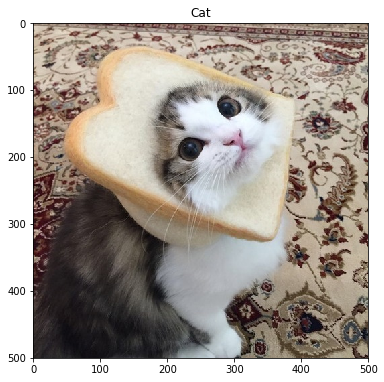

In [57]:
show_rgb(cat_image_path, 'Cat')

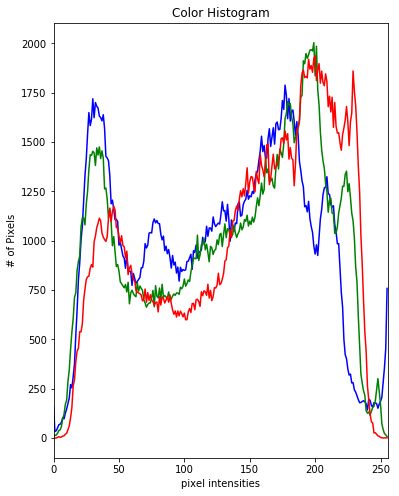

In [58]:
plot_rgb_histogram(cat_image_path)

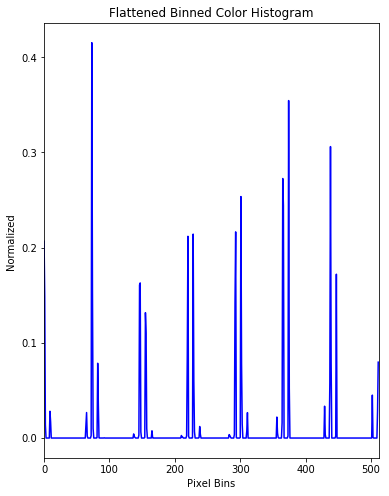

In [59]:
plot_image_histogram(cat_image_path)

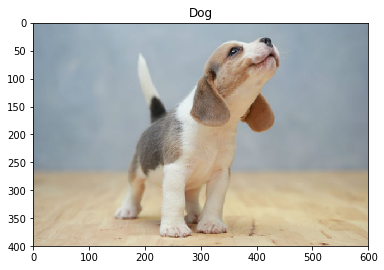

In [60]:
show_rgb(dog_image_path, 'Dog')

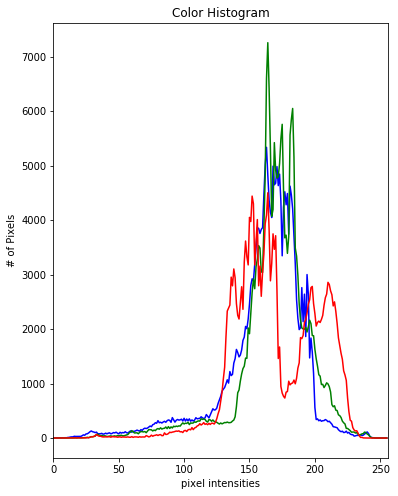

In [61]:
plot_rgb_histogram(dog_image_path)

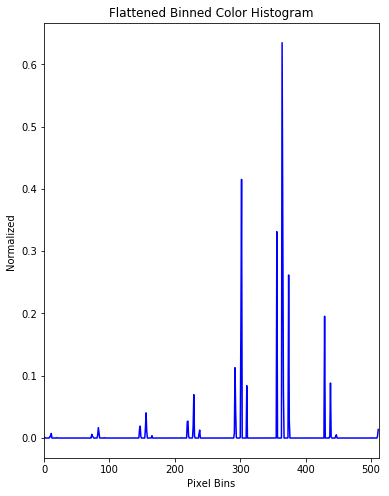

In [62]:
plot_image_histogram(dog_image_path)

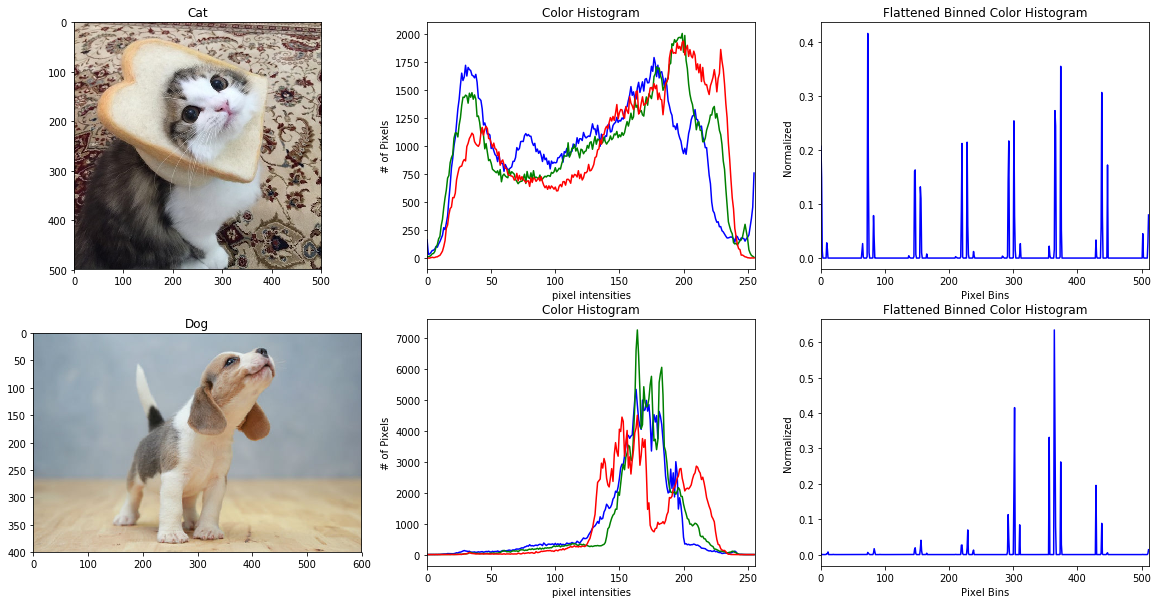

In [63]:
image_summaries([cat_image_path, dog_image_path], ['Cat', 'Dog'])

# Features and Labels

### Features

The features used for this image classification will be:

- Mean Red

- Mean Green

- Mean Blue

- Standard Deviation Red

- Standard Deviation Blue

- Standard Deviation Green

- Image Histogram of 512 Values

In [64]:
# %load rgbhistogram.py
import cv2
import numpy as np

"""
This histogram will be used to charac- terize the color of the flower petals, 
which is a good starting point for classifying the species of a flower
"""


class RGBHistogram:

    def __init__(self, bins):
        self.bins = bins

    def get_features(self, imagePath):
        img = cv2.imread(imagePath)
        features = []
        features.extend(self.extract_color_stats(img))
        features.extend(self.describe(img).tolist())

        return features

    def extract_color_stats(self, image):
        # split the input image into its respective RGB color channels
        # and then create a feature vector with 6 values: the mean and
        # standard deviation for each of the 3 channels, respectively
        (B,G, R) = cv2.split(image)
        stats = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
                    np.std(G), np.std(B)]

        # return our set of features
        return stats

    def describe(self, image, mask=None):
        hist = cv2.calcHist([image], [0, 1, 2],
                            mask, self.bins, [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)

        # return as a feature vector
        return hist.flatten()



### Labels

Labels, meaning whether the image is a Cat, Dog, or Panda or Coast, Highway or Forest is derived from the directory structure.

### Load Image Features

In [65]:
from path_utils import list_images
from rgbhistogram import RGBHistogram
import os
import pandas as pd


def load_image_features(root_image_dir):
    imagePaths = list_images(root_image_dir)
    features = []
    image_labels = []

    rgbHisto = RGBHistogram([8, 8, 8])

    # loop over our input images
    for imagePath in imagePaths:
        cv2_features = rgbHisto.get_features(imagePath)
        features.append(cv2_features)

        # extract the class label from the file path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        image_labels.append(label)
        
    return features, image_labels


In [73]:
image_dir = 'animals'

In [74]:
features, image_labels = load_image_features(image_dir)

In [75]:
features_df = pd.DataFrame(features)

In [76]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,83.639310,76.635112,70.380011,40.753696,42.272927,50.258043,0.225371,0.431310,0.007950,0.00000,...,0.000864,0.000123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000025
1,109.913619,107.132735,100.445499,60.220680,56.485221,54.738015,0.349190,0.098585,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000080
2,131.192992,125.842424,124.542330,69.050864,66.664741,65.190184,0.365248,0.007744,0.000000,0.00000,...,0.000645,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085827
3,112.789174,76.325867,67.447662,55.155232,58.852370,50.370344,0.116902,0.553686,0.434639,0.14661,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016
4,50.692775,70.259947,52.472759,50.127525,42.158463,39.522147,0.571168,0.053852,0.000373,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [77]:
labels_df = pd.DataFrame(image_labels)

In [78]:
labels_df.loc[::400]

,0
0,cats
400,cats
800,cats
1200,dogs
1600,dogs
2000,panda
2400,panda
2800,panda


## Convert String Labels to Numeric Labels

Machine learning algorithms generally have to work with numeric values.  Therefore we have to convert the labels of strings, 'cats', 'dogs', 'panda' to numbers.

This is what the *LabelEncoder* will do.


In [79]:
from sklearn.preprocessing import LabelEncoder
from more_itertools import unique_everseen

le = LabelEncoder()
labels = le.fit_transform(image_labels)

# return the list of unique classes/targets/labels
label_classes =  le.classes_
print(label_classes)
with open(f'./{image_dir}_scene_labels.txt', 'w') as f:
    for i, y in enumerate(label_classes):
        print(f"{i},{y}")
        f.write(f"{i},{y}")
        f.write("\n")


['cats' 'dogs' 'panda']
0,cats
1,dogs
2,panda


In [80]:
labels_df = pd.DataFrame(labels)
labels_df.loc[::400]

,0
0,0
400,0
800,0
1200,1
1600,1
2000,2
2400,2
2800,2


In [81]:
X = features_df
y = labels_df

# Model Selection and Training

Using the Features 'X' and labels 'y', train a number of models and select the best one to use for the image classification.

Keep in mind that since we are using (Shallow) Machine Learning on color features only - the accuracy will be low.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os
from rgbhistogram import RGBHistogram
from sklearn.externals import joblib
from operator import itemgetter
from xgboost import XGBClassifier
import pandas as pd


In [83]:
models = {
    "knn":           KNeighborsClassifier(n_neighbors=3),
    "naive_bayes":   GaussianNB(),
    "logit":         LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm":           SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_leaf=4),
    "mlp2":          MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, alpha=0.0001,
                          solver='adam', verbose=10, tol=0.000000001),
    "mlp":           MLPClassifier(),
    "xgboost":       XGBClassifier(learning_rate=0.01)
}


In [84]:
(trainX, testX, trainY, testY) = train_test_split(X, y,
                                                  test_size=0.25)


In [85]:
def run_model_by_name(model_name):
    # train the model
    print("[INFO] using '{}' model".format(model_name))
    model = models[model_name]
    model.fit(trainX, trainY)
    print(f'Model: \n {model}')
    # make predictions on our data and show a classification report
    print("[INFO] evaluating...")
    predictions = model.predict(testX)
    accuracy = accuracy_score(testY, predictions)
    class_report = classification_report(testY, predictions,
                                         target_names=le.classes_)
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{class_report}')
    return model_name, accuracy, model


In [103]:
model_name = 'xgboost'

In [105]:
results = []
best_model = None
if model_name == 'all':
    for k, v in models.items():
        results.append(run_model_by_name(k))
        for r in results:
            print(r)

    results.sort(key=itemgetter(1))
    print(f"Best Model: {results[-1]}")
    best_model = results[-1][2] # 0-model name, 1-accuracy, 2-model

else:
    model_name, accuracy, model = run_model_by_name(model_name)
    best_model = model
    print(model_name, accuracy)
    saved_model_name = f"{image_dir}_image_classify_scikit_model.sav"
    joblib.dump(model, saved_model_name)
    print(f"Saving model to: {saved_model_name}")


[INFO] using 'xgboost' model
Model: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
[INFO] evaluating...
Model: xgboost
Accuracy: 0.6795727636849133
Classification Report:
              precision    recall  f1-score   support

        cats       0.59      0.67      0.63       246
        dogs       0.61      0.53      0.56       245
       panda       0.84      0.83      0.84       258

   micro avg       0.68      0.68      0.68       749
   macro avg       0.68      0.68      0.68       749
weighted avg       0.68      0.68      0.68       749

xgboost 0.6795727636849133
Saving model to: animals_image_classify_scikit_model.sav


Select the best model based on Accuracy to use for the model execution.

Keep in mind that we use *train_test_split* which takes one random select of data. If we ran, *cross_val_score*, this would be better representation of the model performance.

# Model Execution

In [107]:
test_images = [
        './test_images/cat.jpg',
        './animal_holdout/cats/cats_00843.jpg',
        './animal_holdout/cats/cats_00997.jpg',
        './animal_holdout/dogs/dogs_00102.jpg',
        './animal_holdout/dogs/dogs_00163.jpg',
        './animal_holdout/pandas/panda_00050.jpg',
        './animal_holdout/pandas/panda_00755.jpg'
    ]

rgbHisto = RGBHistogram([8, 8, 8])

In [108]:
def predict_animal(imagePath, model):
    print(f'Predict for image: {imagePath}')
    features = rgbHisto.get_features(imagePath)
    prediction = model.predict([features])

    print(f'Image: {imagePath}')
    print(f'Prediction: {prediction}')
    print(f'Targets: {label_classes[prediction[0]]}')


In [109]:
for test_image in test_images:
    print("-----------------------------")
    predict_animal(test_image, best_model)


-----------------------------
Predict for image: ./test_images/cat.jpg


ValueError: feature_names mismatch: ['0  ', '1  ', '2  ', '3  ', '4  ', '5  ', '6  ', '7  ', '8  ', '9  ', '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', '64 ', '65 ', '66 ', '67 ', '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ', '77 ', '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ', '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517']
expected 161, 460, 507, 124, 482, 437, 90 , 286, 339, 312, 203, 502, 104, 95 , 105, 393, 351, 348, 277, 194, 295, 363, 36 , 382, 106, 17 , 108, 45 , 447, 483, 344, 330, 225, 424, 20 , 373, 340, 26 , 464, 509, 471, 427, 46 , 399, 345, 239, 362, 156, 68 , 127, 415, 262, 453, 425, 145, 285, 235, 164, 191, 329, 210, 390, 38 , 16 , 331, 349, 139, 353, 97 , 474, 276, 370, 65 , 176, 233, 452, 11 , 5  , 116, 169, 197, 302, 165, 258, 440, 57 , 154, 398, 413, 420, 306, 91 , 516, 88 , 439, 433, 369, 511, 135, 69 , 337, 113, 142, 193, 410, 463, 174, 93 , 394, 493, 287, 375, 517, 23 , 96 , 512, 100, 123, 0  , 249, 103, 173, 466, 342, 157, 153, 403, 338, 243, 356, 213, 289, 234, 513, 378, 163, 488, 55 , 47 , 130, 263, 10 , 190, 81 , 78 , 49 , 147, 183, 473, 271, 384, 224, 468, 465, 107, 429, 92 , 254, 182, 292, 470, 52 , 202, 407, 24 , 121, 357, 6  , 303, 438, 406, 99 , 510, 167, 131, 462, 341, 374, 50 , 270, 386, 186, 245, 417, 79 , 61 , 236, 155, 272, 324, 212, 436, 59 , 359, 383, 404, 62 , 250, 455, 492, 480, 126, 211, 298, 44 , 141, 426, 268, 94 , 325, 294, 159, 228, 110, 368, 506, 253, 431, 27 , 196, 334, 346, 187, 446, 54 , 21 , 132, 222, 15 , 496, 67 , 304, 293, 144, 358, 98 , 499, 323, 278, 311, 371, 133, 265, 206, 401, 205, 117, 137, 12 , 175, 467, 39 , 435, 354, 352, 42 , 72 , 364, 261, 457, 177, 419, 421, 181, 478, 317, 158, 484, 238, 241, 80 , 136, 456, 284, 120, 316, 387, 111, 56 , 376, 1  , 476, 66 , 60 , 122, 31 , 388, 118, 279, 497, 347, 255, 377, 490, 221, 314, 372, 505, 307, 381, 308, 7  , 248, 266, 216, 275, 290, 458, 19 , 448, 385, 428, 160, 442, 423, 201, 327, 143, 395, 454, 242, 195, 296, 119, 207, 335, 70 , 146, 63 , 379, 494, 257, 283, 461, 178, 450, 301, 422, 332, 125, 189, 514, 22 , 30 , 35 , 218, 269, 89 , 315, 288, 405, 128, 199, 280, 43 , 3  , 82 , 34 , 227, 215, 220, 48 , 343, 503, 226, 53 , 200, 333, 402, 418, 500, 434, 472, 71 , 475, 138, 432, 232, 166, 392, 32 , 256, 380, 214, 360, 491, 192, 400, 391, 498, 162, 451, 321, 414, 134, 172, 114, 231, 416, 77 , 84 , 112, 73 , 180, 148, 14 , 281, 13 , 150, 170, 408, 445, 198, 479, 267, 504, 411, 2  , 485, 37 , 115, 508, 25 , 322, 185, 240, 299, 40 , 396, 449, 361, 223, 274, 319, 444, 129, 328, 75 , 489, 149, 282, 412, 76 , 102, 259, 247, 469, 83 , 477, 237, 366, 291, 246, 397, 326, 297, 260, 501, 230, 313, 28 , 459, 171, 58 , 300, 309, 33 , 320, 74 , 18 , 486, 487, 264, 86 , 252, 481, 101, 8  , 152, 51 , 430, 209, 4  , 495, 217, 229, 219, 208, 151, 409, 168, 318, 85 , 251, 389, 273, 109, 41 , 184, 336, 365, 310, 305, 64 , 244, 188, 9  , 367, 355, 441, 350, 140, 204, 443, 179, 29 , 515, 87  in input data
training data did not have the following fields: f180, f156, f153, f148, f90, f267, f116, f208, f515, f390, f214, f218, f259, f85, f14, f455, f463, f188, f299, f315, f170, f487, f427, f70, f3, f171, f238, f106, f16, f231, f346, f430, f400, f376, f461, f210, f382, f172, f374, f145, f388, f125, f279, f157, f501, f480, f419, f126, f6, f44, f412, f294, f381, f197, f2, f283, f194, f207, f15, f438, f366, f115, f460, f326, f196, f414, f410, f173, f451, f284, f316, f274, f405, f504, f321, f249, f287, f407, f159, f30, f512, f166, f444, f164, f135, f336, f78, f209, f28, f498, f314, f245, f263, f458, f327, f183, f0, f485, f195, f132, f200, f176, f124, f38, f161, f372, f367, f219, f418, f160, f494, f104, f297, f82, f29, f251, f39, f442, f25, f329, f12, f96, f99, f364, f117, f52, f266, f1, f101, f7, f389, f281, f285, f66, f154, f386, f109, f445, f317, f260, f168, f288, f50, f457, f486, f479, f357, f258, f149, f17, f36, f282, f62, f68, f47, f440, f423, f227, f335, f508, f57, f185, f229, f377, f475, f241, f190, f368, f192, f466, f254, f19, f143, f478, f499, f301, f286, f516, f310, f248, f26, f350, f230, f228, f165, f203, f246, f175, f184, f5, f147, f392, f277, f358, f120, f98, f280, f198, f489, f118, f242, f432, f311, f391, f431, f224, f493, f63, f477, f448, f510, f509, f434, f404, f293, f11, f105, f162, f343, f111, f255, f470, f268, f453, f4, f27, f233, f206, f305, f40, f447, f155, f18, f334, f495, f505, f500, f322, f213, f131, f49, f291, f257, f352, f216, f31, f93, f360, f319, f23, f307, f250, f338, f146, f361, f450, f137, f201, f271, f67, f354, f75, f273, f24, f138, f481, f402, f127, f380, f395, f42, f72, f298, f46, f169, f152, f64, f84, f517, f32, f61, f396, f397, f167, f252, f371, f220, f459, f140, f103, f199, f130, f236, f55, f65, f269, f303, f349, f403, f54, f226, f312, f342, f83, f80, f217, f290, f379, f511, f76, f113, f411, f235, f318, f491, f73, f264, f425, f225, f45, f158, f13, f10, f398, f221, f345, f179, f300, f189, f339, f256, f337, f422, f384, f409, f464, f136, f108, f177, f262, f441, f467, f365, f385, f272, f278, f69, f296, f355, f344, f439, f490, f320, f211, f309, f53, f471, f325, f186, f443, f139, f408, f71, f502, f513, f292, f373, f313, f276, f212, f348, f20, f150, f205, f182, f323, f121, f86, f351, f265, f503, f102, f87, f362, f415, f308, f375, f119, f193, f482, f333, f122, f74, f77, f462, f324, f128, f474, f232, f437, f141, f417, f454, f446, f97, f9, f332, f59, f341, f331, f134, f492, f187, f33, f81, f253, f261, f22, f433, f91, f94, f304, f383, f484, f465, f295, f34, f306, f456, f387, f247, f424, f58, f435, f401, f239, f275, f133, f60, f174, f202, f429, f48, f393, f142, f497, f406, f449, f204, f163, f394, f514, f416, f420, f488, f378, f129, f222, f243, f88, f237, f353, f215, f363, f507, f100, f56, f347, f234, f426, f302, f421, f436, f356, f110, f191, f123, f340, f95, f21, f452, f289, f151, f506, f428, f112, f89, f144, f270, f468, f181, f107, f473, f472, f330, f223, f35, f43, f483, f399, f114, f178, f476, f496, f328, f51, f359, f92, f240, f41, f244, f370, f469, f369, f37, f413, f8, f79